<div class="title">Non-Linear Models and SVMs</div>
<div class="subtitle">Machine Learning</div>
<div class="author">Carlos María Alaíz Gudín &mdash; Universidad Autónoma de Madrid</div>

---

**Configuration**

This cell defines the general configuration of Jupyter Notebook.

In [1]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

This cell imports the packages to be used.

In [2]:
# Standard packages.
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
import sys

# Custom packages.
from ml import (
	generate_dataset_blobs,
	generate_dataset_lr_mv,
	generate_dataset_quadrant,
	generate_dataset_r_nl_1,
	plot_all_linear_separators,
	plot_dataset,
	plot_dataset_clas,
	plot_linear_model_clas,
	plot_nonlinear_model,
	plot_nonlinear_model_clas,
	plot_svc,
	plot_svr,
)

# Initialisations.
matplotlib.rc("figure", figsize=(15, 5))
seed = 123
sys.dont_write_bytecode = True

# Limitation of Linear Models

## Classification

### Dataset

The cell below defines a 2-dimensional non-linear classification dataset.

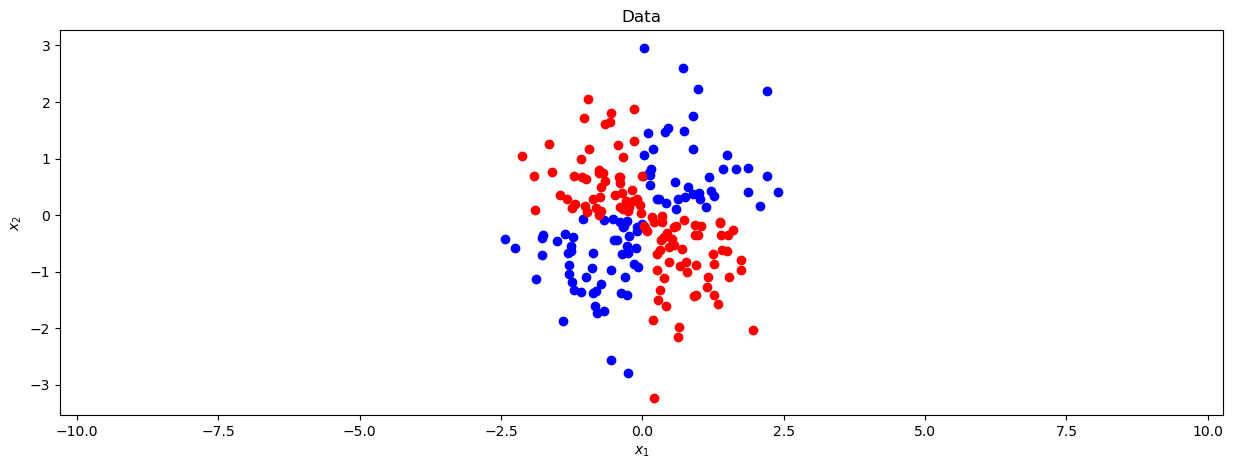

In [3]:
x, y = generate_dataset_quadrant(seed)
plot_dataset_clas(x, y)

<div class="qst">

* Is it possible to tell in advance that it is non-linear using the plot?

</div>

Sí, porque las dos categorías no se pueden separar con una línea, se encuentran aglomeradas. Es un problema sencillo (se puede poner un punto en un espacio aleatorio y nos imaginamos de qué color va a ser), pero no se puede resolver de forma lineal.

### Automatic Estimation

The cell below trains a linear model over the previous dataset.

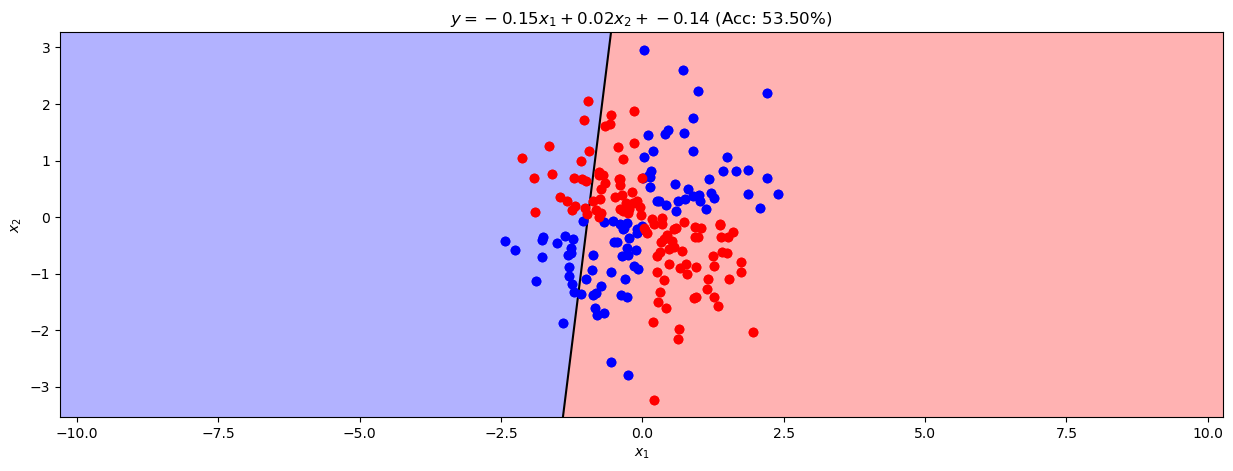

In [4]:
################################################################################
model = LogisticRegression(solver="lbfgs")
model.fit(x, y)
################################################################################

plot_linear_model_clas(x, y, model.coef_[0], model.intercept_)

<div class="qst inspect">

* How does the previous model perform?
* Does the resultant model look sensible?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998408)
</div>

No, it does not look sensible, a linear model will not solve this problem.

# Generalized Linear Models

## Feature Construction in Classification

With the code below, the original inputs can be transformed into new features to build a Generalized Linear Model for a classification problem.

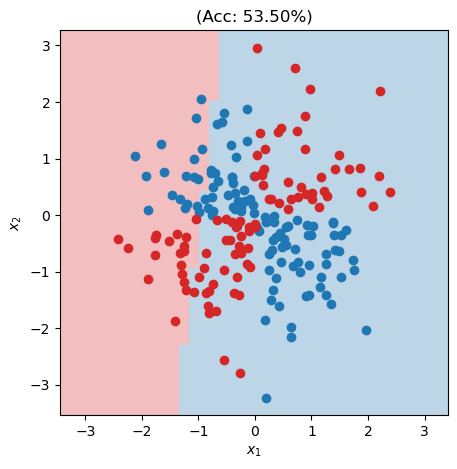

In [8]:
x, y = generate_dataset_quadrant(seed)


def phi(x):
    ############################################################################
    # A new synthetic feature can be defined here, by default it does not transform the input.
    # x[:, 0] corresponds to the first feature, and x[:, 1] to the second feature.
    x_n = x
    ############################################################################
    return x_n.reshape(x.shape[0], -1)


################################################################################
model = LogisticRegression(solver="lbfgs")
model.fit(phi(x), y)
################################################################################

plt.figure(figsize=(5, 5))
plot_nonlinear_model_clas(x, y, model, phi)

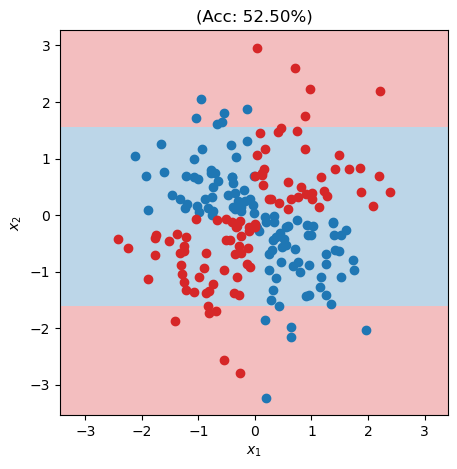

In [10]:
x, y = generate_dataset_quadrant(seed)


def phi(x):
    ############################################################################
    # A new synthetic feature can be defined here, by default it does not transform the input.
    # x[:, 0] corresponds to the first feature, and x[:, 1] to the second feature.
    x_n = x[:,0]**2
    x_n = x[:,1]**2
    ############################################################################
    return x_n.reshape(x.shape[0], -1)


################################################################################
model = LogisticRegression(solver="lbfgs")
model.fit(phi(x), y)
################################################################################

plt.figure(figsize=(5, 5))
plot_nonlinear_model_clas(x, y, model, phi)

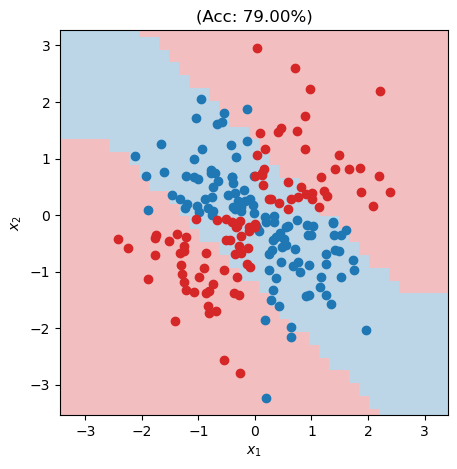

In [11]:
x, y = generate_dataset_quadrant(seed)


def phi(x):
    ############################################################################
    # A new synthetic feature can be defined here, by default it does not transform the input.
    # x[:, 0] corresponds to the first feature, and x[:, 1] to the second feature.
    x_n = (x[:,0] + x[:,1])**2
    ############################################################################
    return x_n.reshape(x.shape[0], -1)


################################################################################
model = LogisticRegression(solver="lbfgs")
model.fit(phi(x), y)
################################################################################

plt.figure(figsize=(5, 5))
plot_nonlinear_model_clas(x, y, model, phi)

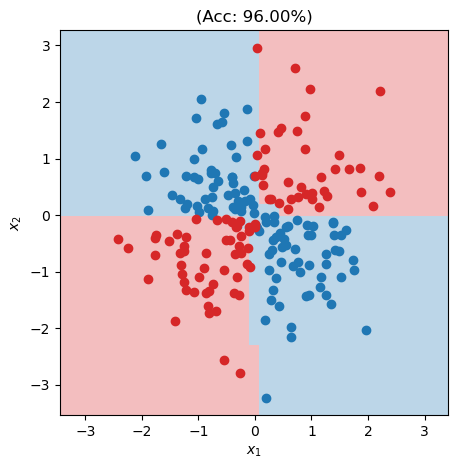

In [12]:
x, y = generate_dataset_quadrant(seed)


def phi(x):
    ############################################################################
    # A new synthetic feature can be defined here, by default it does not transform the input.
    # x[:, 0] corresponds to the first feature, and x[:, 1] to the second feature.
    x_n = x[:,0]* x[:,1]
    ############################################################################
    return x_n.reshape(x.shape[0], -1)


################################################################################
model = LogisticRegression(solver="lbfgs")
model.fit(phi(x), y)
################################################################################

plt.figure(figsize=(5, 5))
plot_nonlinear_model_clas(x, y, model, phi)

Los cuadrantes se deben a signo de la multiplicación de x1 y x2. Los cuadrantes rojos son aquellos en los que $x^1x^2$ tiene un signo positivo (ya sea porque es negativo por negativo o positivo por positivo), mientras que los azules tienen un $x^1x^2$ negativo.

<div class="qst">

* Try with different mappings, like $\boldsymbol{\phi}(\mathbf{x}) = \mathbf{x}$, $\boldsymbol{\phi}(x) = (x_1^2, x_2^2)$, $\boldsymbol{\phi}(\mathbf{x}) = (x_1 + x_2)^2$, and $\boldsymbol{\phi}(x) = x_1 x_2$.
* Which one works best?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998410)
</div>

El modelo que mejor funciona es el último, con un rendimiento del 96%. Estamos transformando los datos y utilizar un modelo lineal a esos datos transformados. Visto en las dimensiones originales, el modelo no es lineal, pero el modelo visto del espacio de phi sí sería lineal.

# Kernel Ridge Regression

## RBF Kernel

A Kernel Ridge Regression model with RBF kernel can be trained with the cell below.

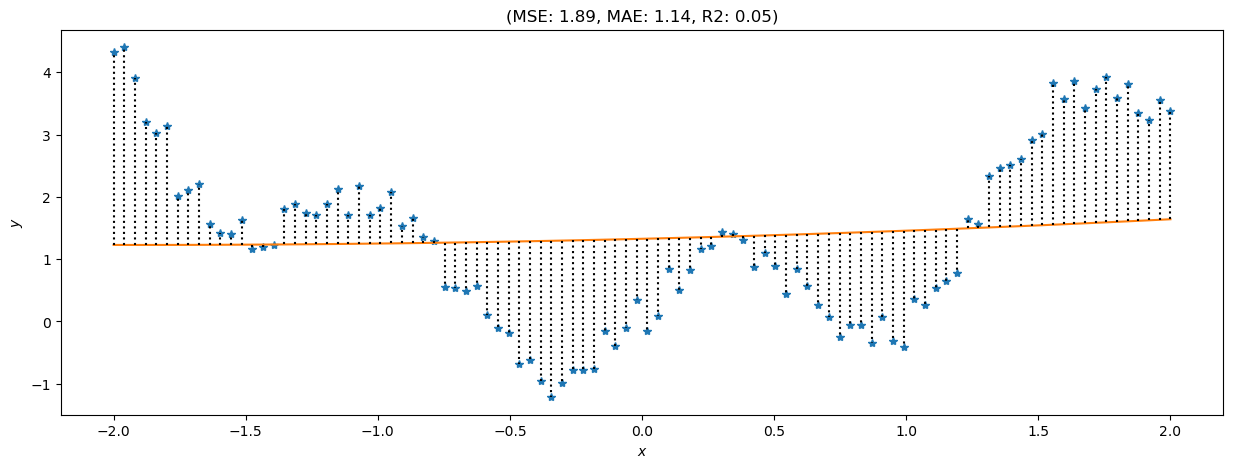

In [6]:
x, y = generate_dataset_r_nl_1(seed)

################################################################################
model = KernelRidge(kernel="rbf", gamma=1e-3, alpha=1e-2)
model.fit(x, y)
################################################################################

plot_nonlinear_model(x, y, model)

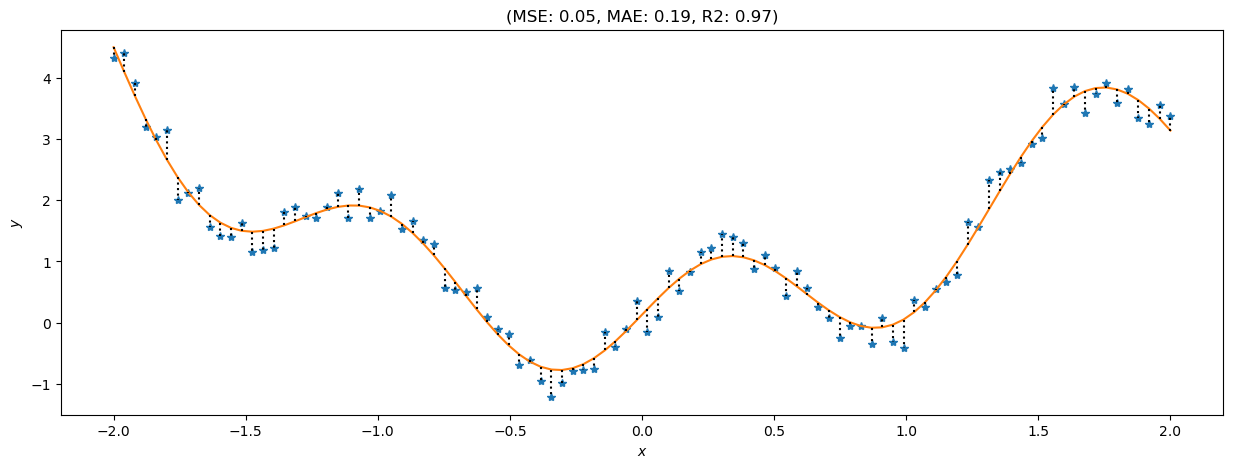

In [7]:
x, y = generate_dataset_r_nl_1(seed)

################################################################################
model = KernelRidge(kernel="rbf", gamma=1e0, alpha=1e-2)
model.fit(x, y)
################################################################################

plot_nonlinear_model(x, y, model)

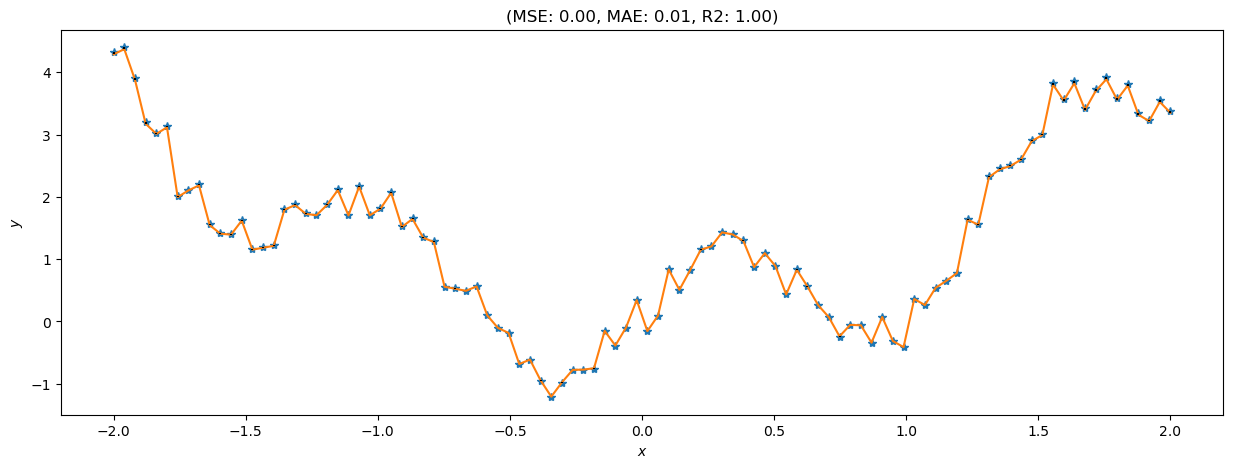

In [8]:
x, y = generate_dataset_r_nl_1(seed)

################################################################################
model = KernelRidge(kernel="rbf", gamma=1e3, alpha=1e-2)
model.fit(x, y)
################################################################################

plot_nonlinear_model(x, y, model)

<div class="qst">

* Try different values of the kernel parameter (variable `gamma`, the inverse of the Gaussian width), like $10^{-3}$, $10^{0}$, and like $10^{3}$.
* What is the influence of this parameter?
* Can this model over-fit the data?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998411)
</div>

The larger gamma, the more local and prone to over-fitting the model is.

The usual approach to set the value of the hyper-parameters is through cross-validation, as done below.

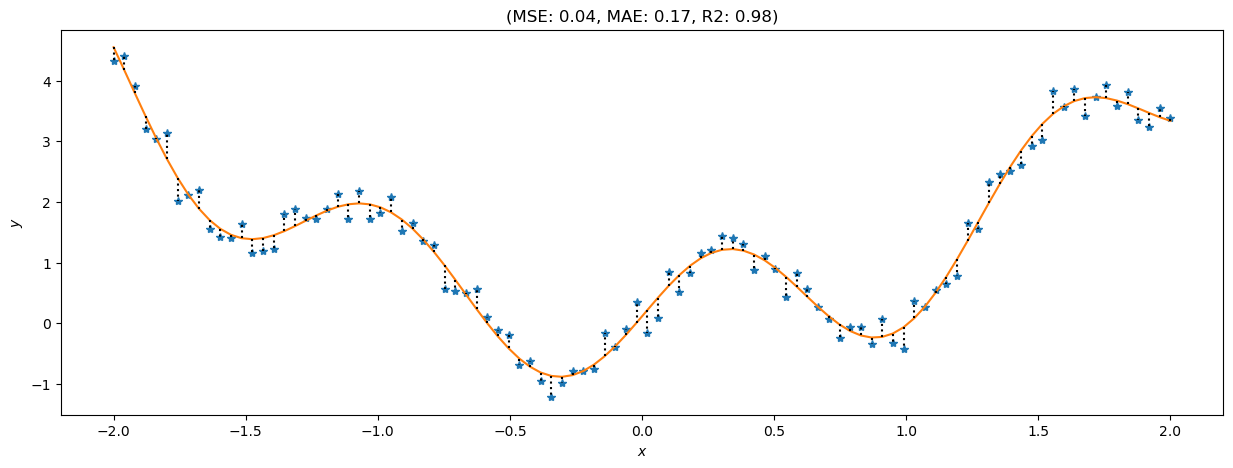

In [9]:
################################################################################
gs = GridSearchCV(
    KernelRidge(kernel="rbf"),
    param_grid={"alpha": np.logspace(-5, 5, 11), "gamma": np.logspace(-3, 3, 7)},
)
gs.fit(x.reshape(-1, 1), y)
################################################################################

plot_nonlinear_model(x, y, gs)

# SVC

## Multiple Hyperplanes

### Dataset

This example is simply a 2-dimensional binary classification dataset, with two clearly separable classes.

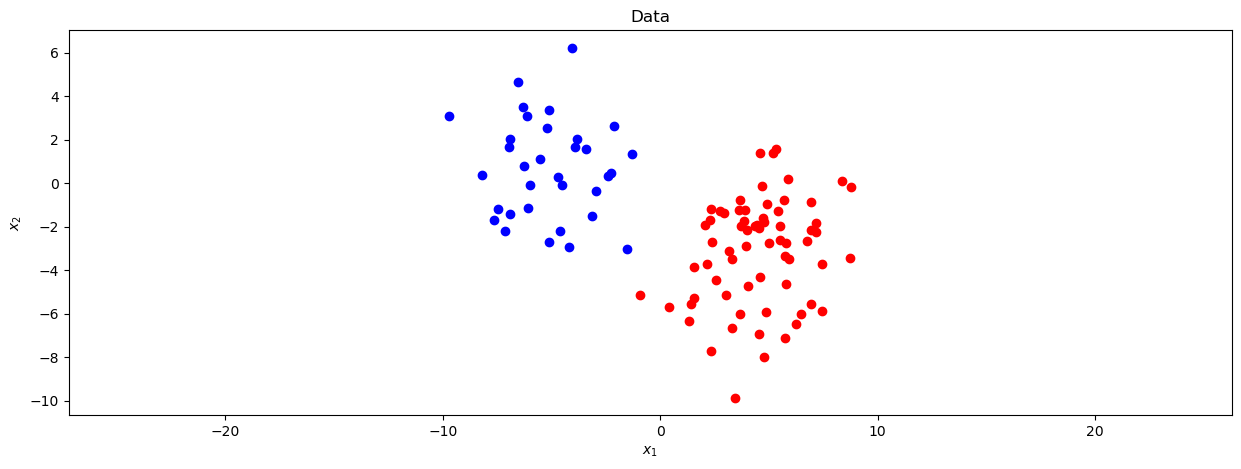

In [3]:
x, y = generate_dataset_blobs(seed, n_pat=100, n_dim=2, std=2.0)
plot_dataset_clas(x, y)

### Different Perfect Classifiers

There are many different hyperplanes (in this case, simply straight lines) that can be used to separate both classes.
This code represents some of them.

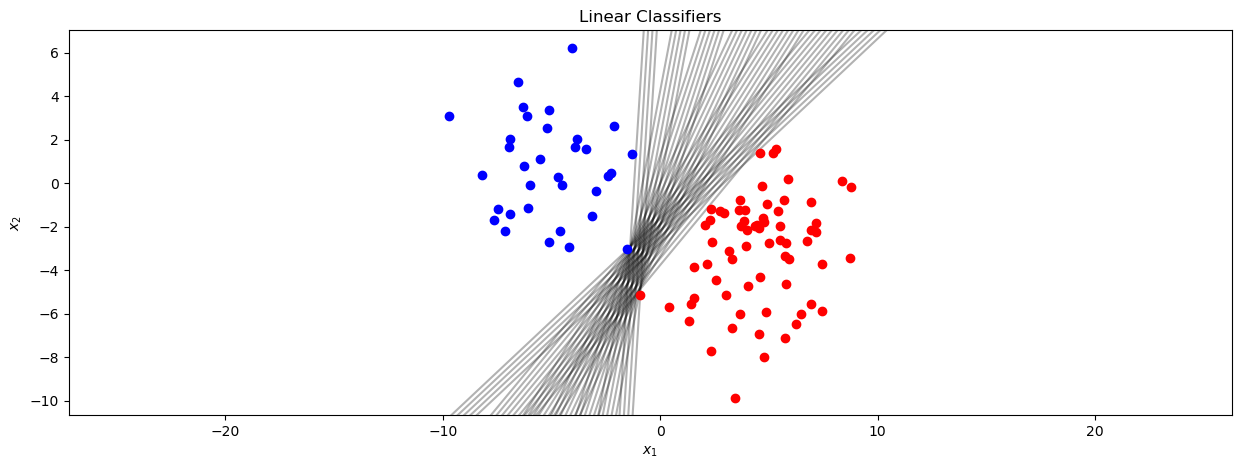

In [4]:
plot_all_linear_separators(x, y)

<div class="qst">

* Which linear model (straight line) seems the best option to separate the classes?
  Why?

</div>

Aquel que no toque ningún punto (esté entre los dos).

This cell highlight the model that it is somehow "in the middle" of both classes.

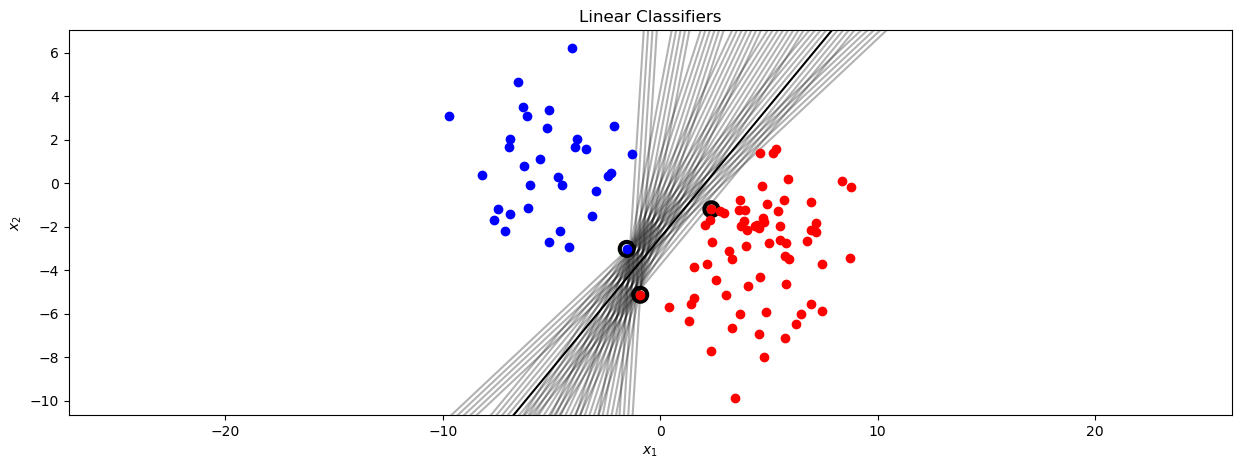

In [5]:
plot_all_linear_separators(x, y, plot_best=True)

<div class="qst">

* Does this model coincide with your intuition of the best one?
* Why are those three samples circled?
* Does the model in the middle depend on any other sample, apart from these three?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998412)
</div>

Does the model in the middle depends on any other sample, apart from these three?

No, the model is characterized by these "closest" samples.

## Optimization of the HM-SVC

### Support Vectors

The cell bellow trains the SVC and accesses the support vectors inside the model.
According to the theory, these points should be over the supporting hyperplane (i.e., $(\mathbf{w}^\intercal \mathbf{x}_i + b) = y_i = \pm1$).

Index of support vectors: [ 3 62 63]
Support vectors:
 [[ 2.35006925 -1.20198621]
 [-0.92397477 -5.13503856]
 [-1.54414824 -3.02379614]]
Prediction over the support vectors: [-1.00013407 -1.00013349  1.00026803]


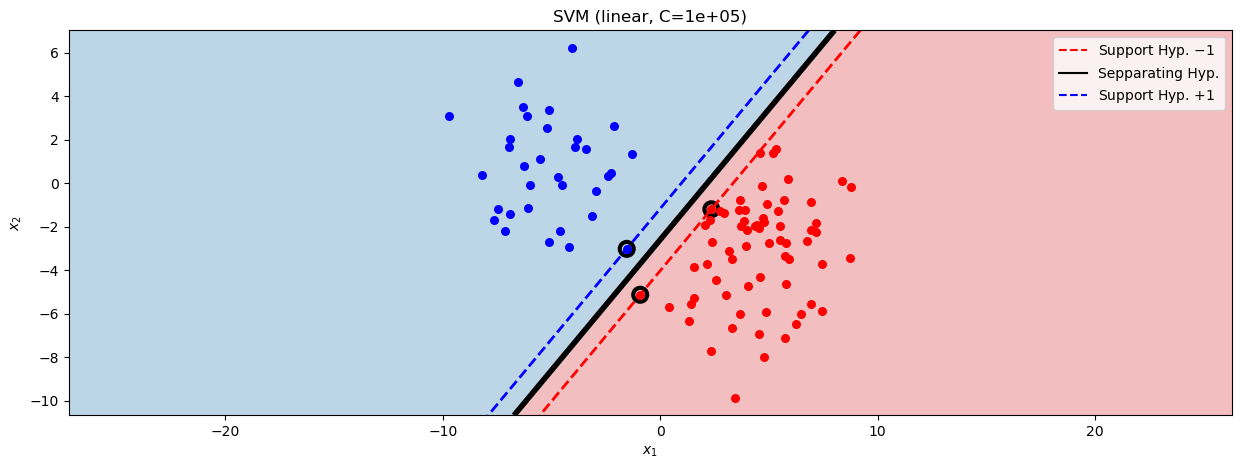

In [3]:
x, y = generate_dataset_blobs(seed, n_pat=100, n_dim=2, std=2.0)

model = SVC(C=1e5, kernel="linear")
model.fit(x, y)

################################################################################
print("Index of support vectors:", model.support_)
print("Support vectors:\n", model.support_vectors_)
print(
    "Prediction over the support vectors:",
    model.decision_function(model.support_vectors_),
)
################################################################################

plot_svc(x, y, model)

<div class="qst">

* Does these support vectors coincide with the circled points of the plot?
* Check the prediction of the model over the support vectors.
  Does this match the theory?

</div>

Los vectores de soporte coinciden con los puntos rodeados del gráfico, que son los puntos marginales.

### Recovering the Primal Solution

In order to recover the primal hyperplane, the following equation can be used:
$$ \mathbf{w} = \sum_{i = 1}^N y_i \alpha_i \mathbf{x}_i . $$
Moreover, since for a support vector $(\mathbf{w}^\intercal \mathbf{x}_i + b) = y_i$, then the bias $b$ can be recovered from any support vector as:
$$ b = y_i - \mathbf{w} \mathbf{x}_i .$$

<div class="qst inspect">

The following cell recovers the primal linear model $\{b, \mathbf{w}\}$ from the dual variables (it should be noted that the coefficients `model.dual_coef_` correspond already to $y_i \alpha_i$).

* Does this code match the theory?
* Compare the computed primal model with the primal variables directly accessible through `coef_` and `intercept_`.
  Is the primal model being recovered correctly?

</div>

In [4]:
################################################################################
w = model.dual_coef_[0] @ model.support_vectors_
print("Primal hyperplane (computed):    ", w)
print("Primal hyperplane (from sklearn):", model.coef_[0])

b = y[model.support_] - x[model.support_, :] @ w
print("")
print("Primal bias (computed from every support vector):", b)
print("Primal bias (from sklearn):                      ", model.intercept_)
################################################################################

Primal hyperplane (computed):     [-0.84133089  0.70036032]
Primal hyperplane (from sklearn): [-0.84133089  0.70036032]

Primal bias (computed from every support vector): [1.81900932 1.81900874 1.81860722]
Primal bias (from sklearn):                       [1.81887525]


### Training the Model over the Additional Data

The SVMs are sparse models, based only on certain samples (the support vectors), which are located intuitively near the other class.
The following cell adds six additional points to the original dataset, but far away from the border.

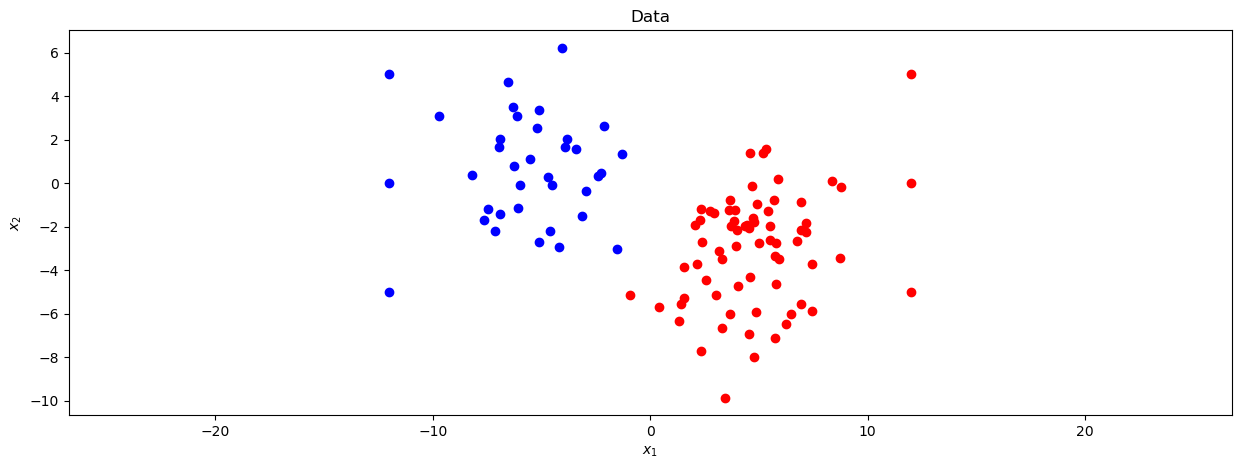

In [5]:
x_ext = np.vstack(
    (x, np.array([[-12, 0], [12, 0], [-12, -5], [12, -5], [-12, 5], [12, 5]]))
)
y_ext = np.append(y, [1, -1, 1, -1, 1, -1])

plot_dataset_clas(x_ext, y_ext)

<div class="qst">

* Will these points affect the model?
  Why?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998414)
</div>

Does the margin depends on any other sample, apart from the three marked points?
No, these three points are the only ones that determine the margin, and the ones the SVC will consider.


Do you think that these points will affect the model? Why?
No, the model will be exactly the same.

This cells trains another SVM over the modified dataset.

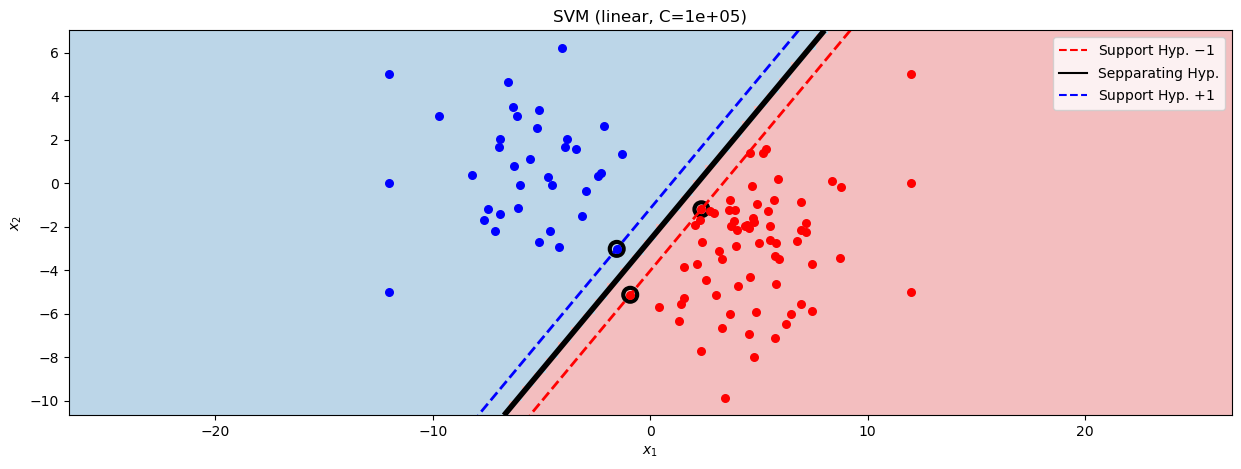

In [6]:
################################################################################
model = SVC(C=1e5, kernel="linear")
model.fit(x_ext, y_ext)
################################################################################

plot_svc(x_ext, y_ext, model)

<div class="qst inspect">

* Is the model different from the previous one?
  Why?

</div>

No, es igual.

## Illustration of the SM-SVC

### Dataset

In the following dataset an overlapping between classes is allowed.

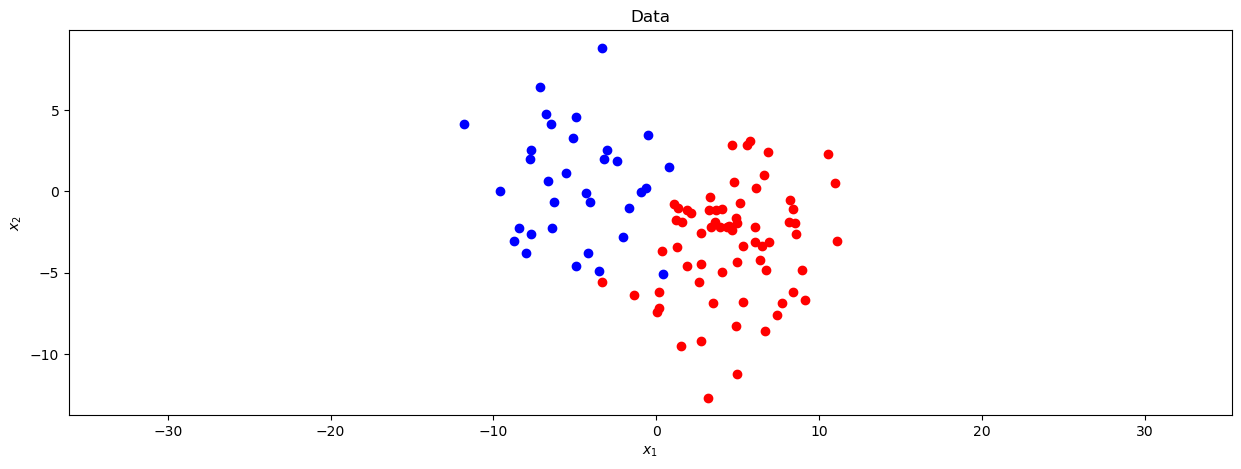

In [7]:
x, y = generate_dataset_blobs(seed, std=3.0)
plot_dataset_clas(x, y)

<div class="qst">

* Are both classes still linearly separable?

</div>

Mayormente, pero no totalmente.

### Model

A Soft-Margin SVC can be trained over this dataset.
The slack variables (distance to the corresponding supporting hyperplane) are also represented as dotted lines.

The hyper-parameter $C$ is controlled by the variable `C`.

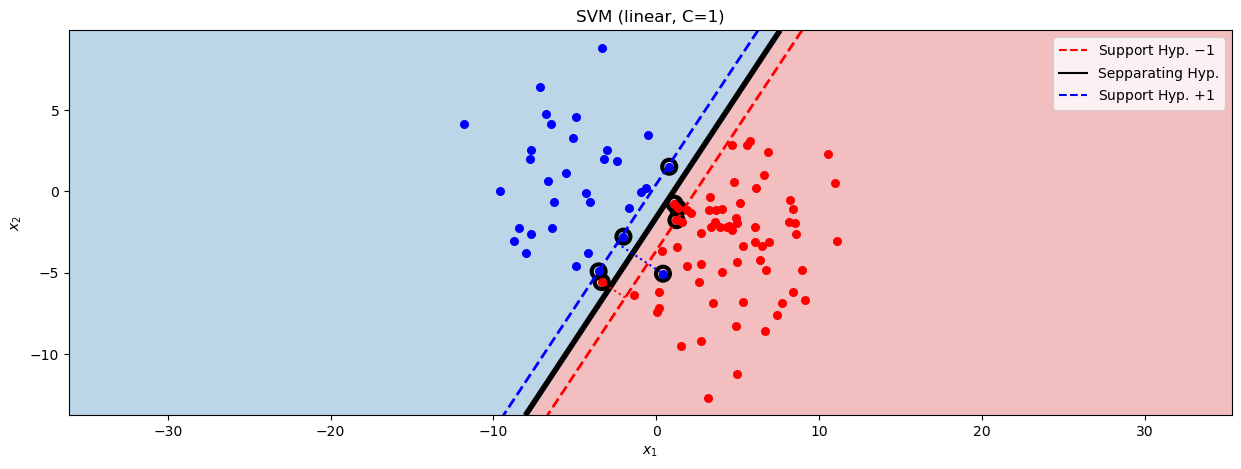

In [8]:
################################################################################
model = SVC(C=1e0, kernel="linear")
model.fit(x, y)
################################################################################

plot_svc(x, y, model, plot_slack=True)

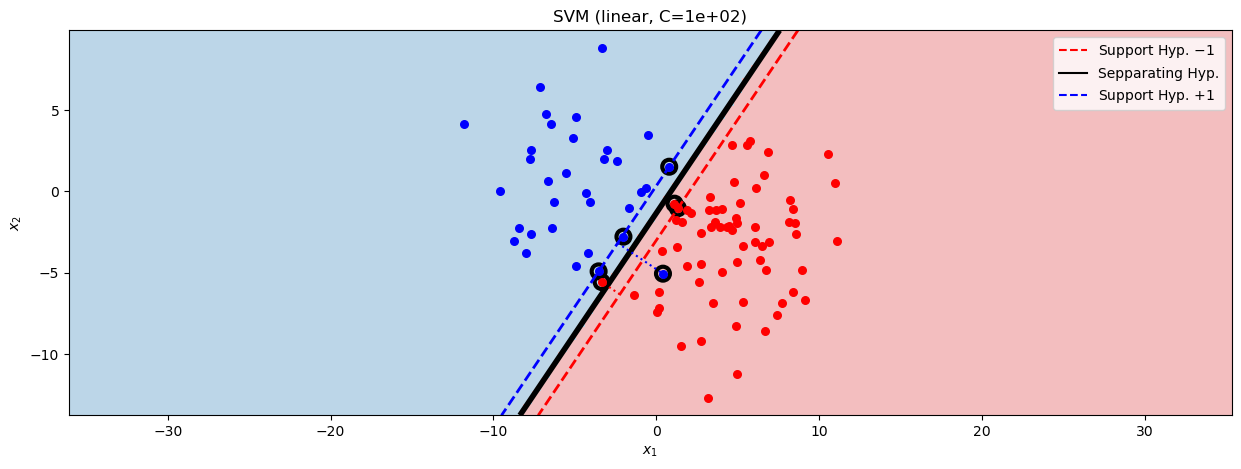

In [9]:
################################################################################
model = SVC(C=1e2, kernel="linear")
model.fit(x, y)
################################################################################

plot_svc(x, y, model, plot_slack=True)

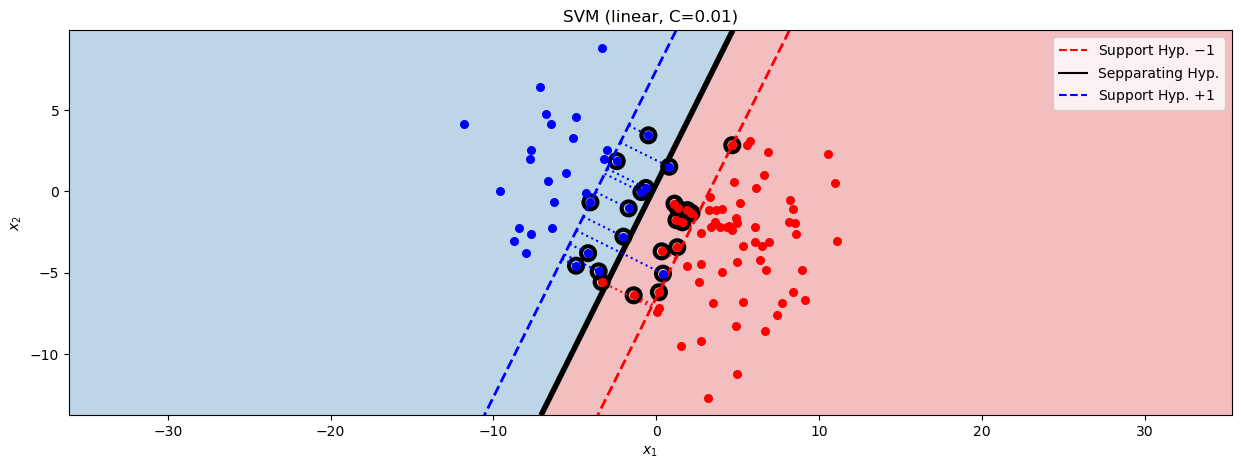

In [10]:
################################################################################
model = SVC(C=1e-2, kernel="linear")
model.fit(x, y)
################################################################################

plot_svc(x, y, model, plot_slack=True)

<div class="qst">

* Are all the points correctly classified?
* The slack variables can be larger than $0$ even if the point is still correctly classified.
  Can you distinguish this on the plot?
* According to the theory, the support vectors are either over the corresponding supporting hyperplane or on the wrong side of it.
  Can this be seen in the plot?
* Try different values of $C$ like $10^{-2}$ and $10^{2}$.
    - How does the margin change?
    - How does the training error change?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998416)
</div>

Large values of 𝐶 lead to a small margin with a small training error.

# SVR

## Illustration

### Dataset

This cell generates a regression dataset.

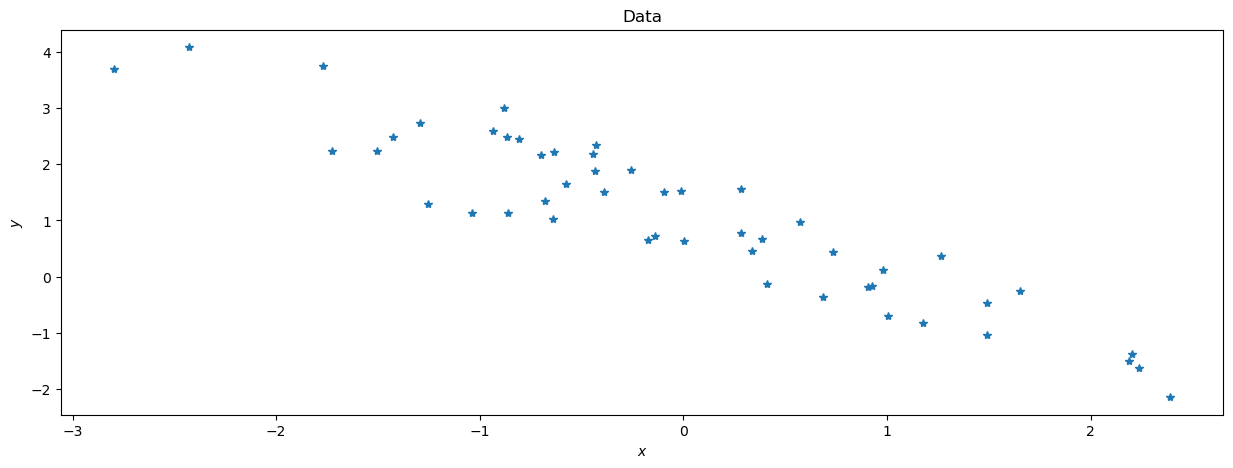

In [11]:
x, y, _, _ = generate_dataset_lr_mv(seed, n_dim=1)
plot_dataset(x, y)

<div class="qst">

* Is the problem (approximately) linear?

</div>

Sí, el patrón sigue una distribución lineal

### Model

This cell trains an SVR over the previous dataset, and depicts it.
The support vectors (those outside the $\epsilon$-insensitive tube, or in the border) are the circled samples.
The slack variables (distance to the $\epsilon$-insensitive tube) are represented as dotted lines.

The hyper-parameter $\epsilon$ is controlled by the variable `epsilon`, and $C$ by the variable `C`.

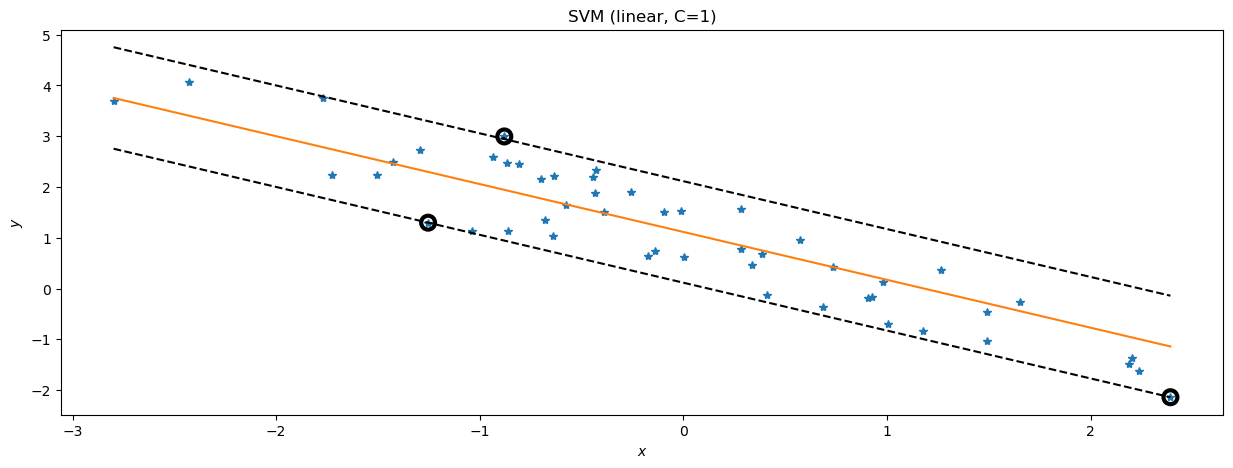

In [12]:
################################################################################
model = SVR(epsilon=1e0, C=1e0, kernel="linear")
model.fit(x, y)
################################################################################

plot_svr(x, y, model, plot_slack=True)

En este caso buscamos que los puntos estén dentro del margen.

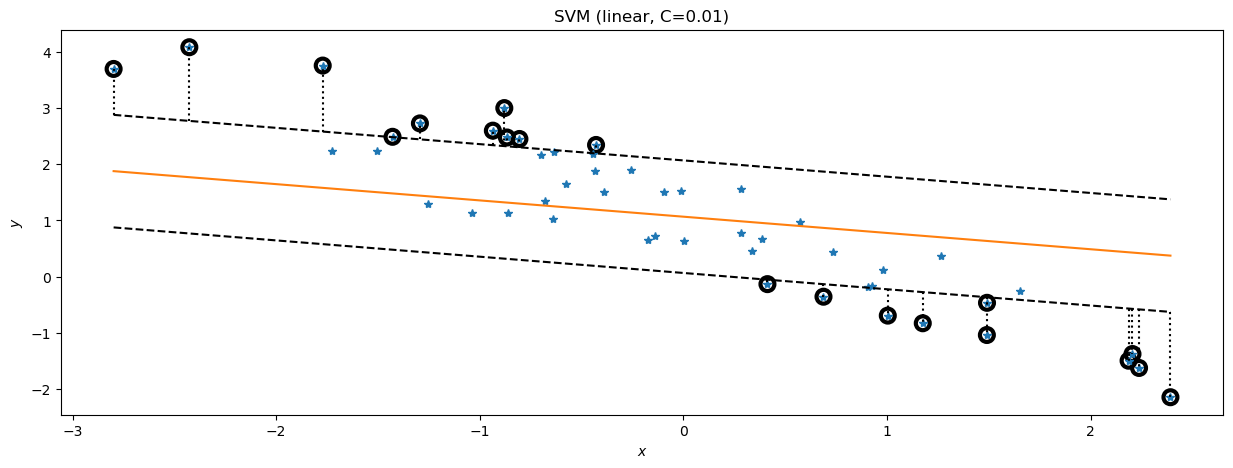

In [13]:
################################################################################
model = SVR(epsilon=1e0, C=1e-2, kernel="linear")
model.fit(x, y)
################################################################################

plot_svr(x, y, model, plot_slack=True)

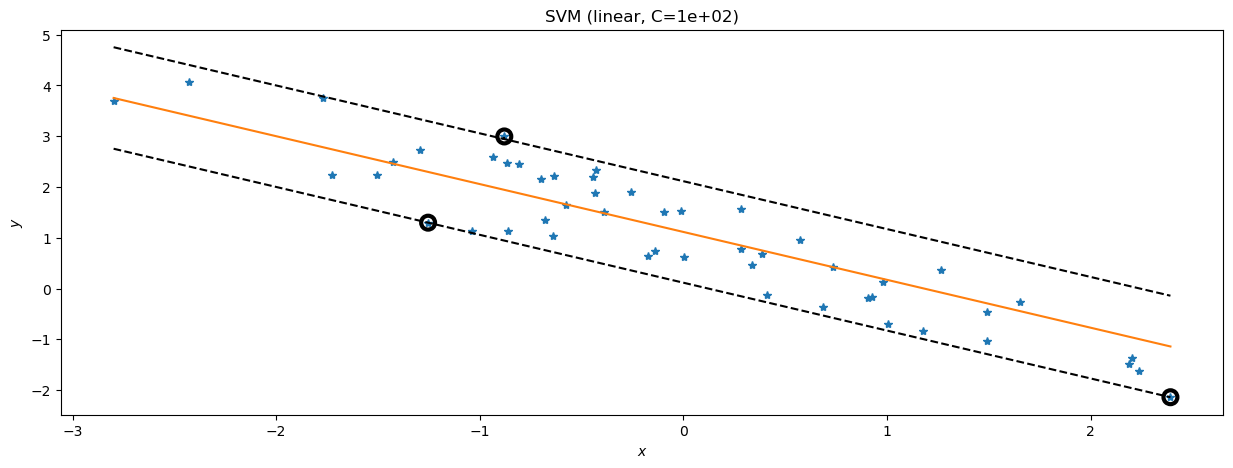

In [14]:
################################################################################
model = SVR(epsilon=1e0, C=1e2, kernel="linear")
model.fit(x, y)
################################################################################

plot_svr(x, y, model, plot_slack=True)

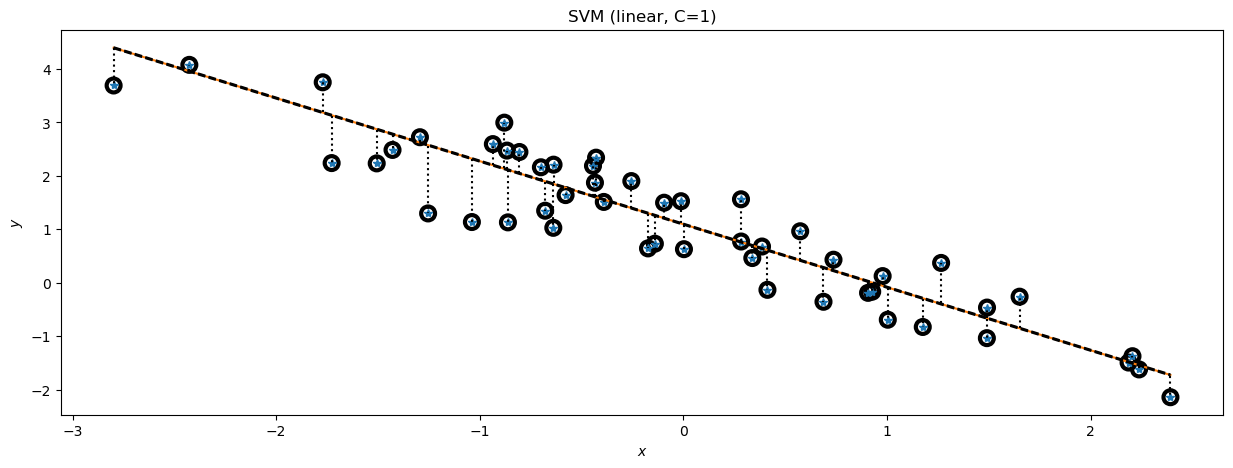

In [15]:
################################################################################
model = SVR(epsilon=1e-2, C=1e0, kernel="linear")
model.fit(x, y)
################################################################################

plot_svr(x, y, model, plot_slack=True)

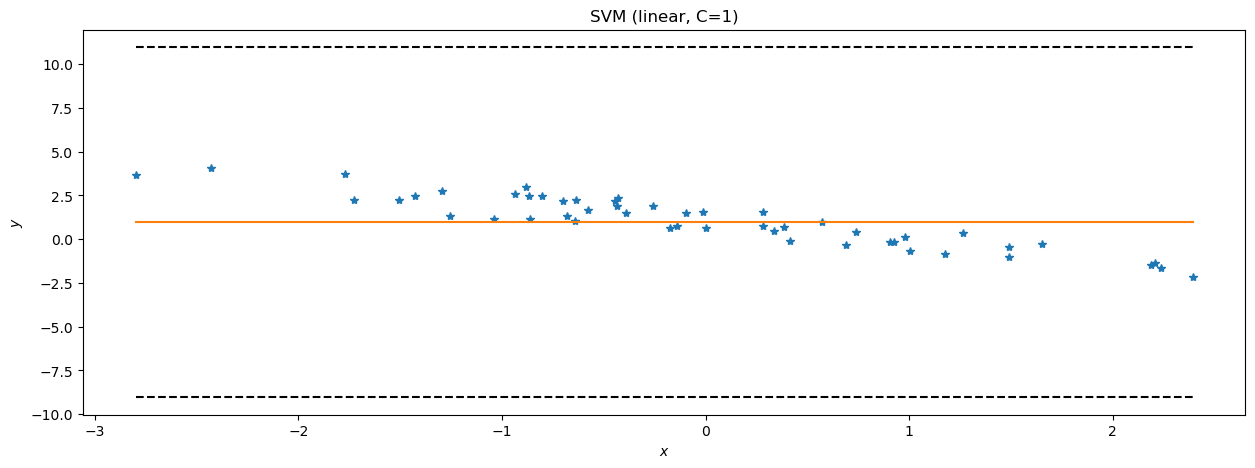

In [16]:
################################################################################
model = SVR(epsilon=1e1, C=1e0, kernel="linear")
model.fit(x, y)
################################################################################

plot_svr(x, y, model, plot_slack=True)

<div class="qst">

* Try to change the value of $C$ to $10^{-2}$ and $10^{2}$.
  Is it possible to induce over-fitting?
  Why?
  Notice that in this case the model is still linear.
* What happens when you decrease the value of $\epsilon$ to $10^{-2}$?
  And when you increase it to $10^{1}$?
  Why?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998418)
</div>

# Non-Linear SVM

## SVR

### Dataset

This cell generates a regression dataset.

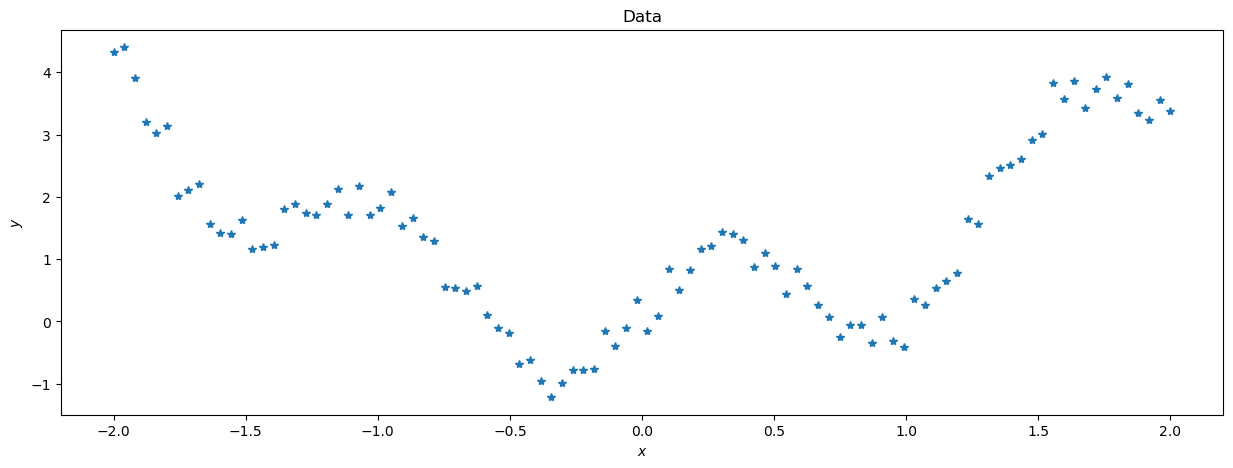

In [17]:
x, y = generate_dataset_r_nl_1(seed)
plot_dataset(x, y)

<div class="qst">

* Is the problem (approximately) linear?

</div>

### Linear Model

The code below trains a linear SVM over the previous problem.

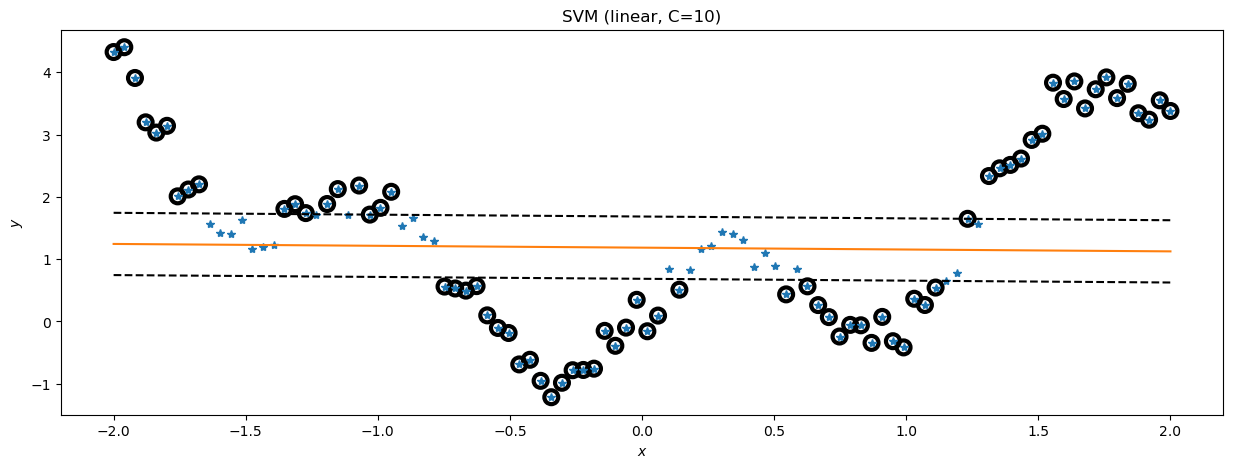

In [18]:
model = SVR(kernel="linear", epsilon=5e-1, C=1e1)
model.fit(x, y)

plot_svr(x, y, model)

<div class="qst">

* How does the previous model perform?

</div>

### Non-Linear Model

This cell trains a non-linear SVM with RBF kernel, where the parameter of the kernel $\gamma$ is given by the variable `gamma`.

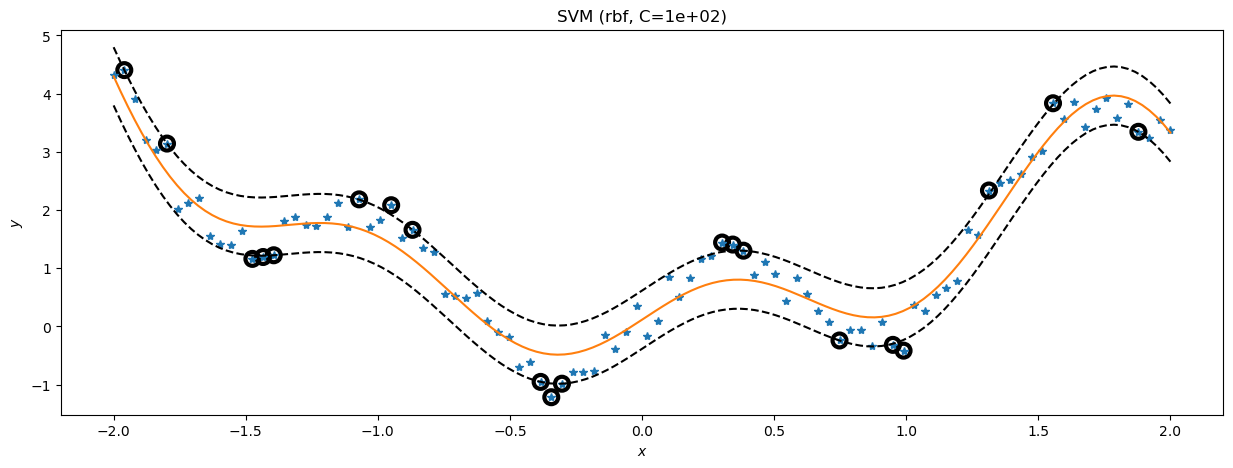

In [20]:
model = SVR(kernel="rbf", epsilon=5e-1, C=1e2, gamma="scale")
model.fit(x, y)

plot_svr(x, y, model)

<div class="qst">

* How does the previous model perform?
* Try modifying the value of $C$ to $10^{-2}$ and $10^2$.
  Is the model under-fitting or over-fitting the data?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998419)
</div>

The usual approach to set the value of the hyper-parameters is through cross-validation, as done below.

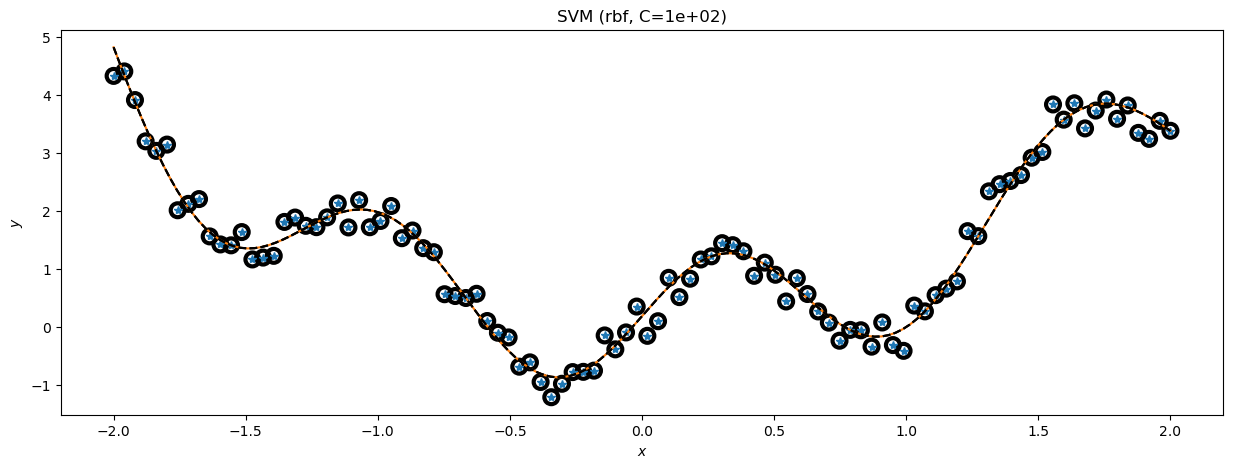

In [21]:
################################################################################
gs = GridSearchCV(
    SVR(kernel="rbf"),
    cv=10,
    param_grid={
        "C": np.logspace(-2, 2, 5),
        "gamma": np.logspace(-5, 5, 11),
        "epsilon": np.logspace(-3, 0, 4),
    },
)
gs.fit(x.reshape(-1, 1), y)
################################################################################

plot_svr(x, y, gs.best_estimator_)